# Clean-Up Model

Image restoration is a fundamental task in computer vision that aims to recover the original appearance of images that have been degraded or corrupted. In this data challenge project, we will focus on the task of image restoration using a Convolutional Neural Network (CNN).

The provided code demonstrates a CNN-based image restoration model using the TensorFlow and Keras libraries. The goal is to restore degraded images by learning the mapping between the degraded input images and their corresponding clean versions. The model utilizes a U-Net-like architecture, which consists of convolutional and upsampling layers to capture both low-level and high-level features in the images.

The dataset used for this project includes pairs of input and output images. The input images represent degraded versions, while the output images represent clean and restored versions. The project follows the following steps:

1) Loading and Preprocessing the Data:

- The project assumes that the images are stored in a directory specified by dir_name.
- The code retrieves the list of input and output image files, assuming a naming convention where "input" is present in the input image file names and "output" is present in the output image file names.
- The images are loaded using PIL (Python Imaging Library) and converted to NumPy arrays.
A cropping function is applied to center-crop the images to a specific size.

2) Splitting the Data:

- The data is split into training and validation sets using the train_test_split function from scikit-learn.
- The split is performed on both the input and output images to ensure corresponding pairs are maintained.

3) Defining the Model:

- The model is defined using the Sequential API of Keras.
- It consists of convolutional layers with max pooling and upsampling layers to encode and decode image features.
- The final layer uses the sigmoid activation function to produce the restored image.

4) Compiling and Training the Model:

- The model is compiled with the Adam optimizer and the mean squared error loss function.
- The training data is used to fit the model, with a specified number of epochs.
- The validation data is used to evaluate the model's performance during training.

5) Image Restoration and Visualization:

- A new input image is loaded, and the trained model is used to predict the restored version of the image.
- The restored image and the original input image are displayed using matplotlib.
- This notebook provides a starting point for exploring image restoration using CNNs. By understanding and modifying the code, you can experiment with different architectures, loss functions, and training strategies to further enhance image restoration performance.

Note: Ensure that the required libraries are installed before running the code.

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
tf.config.list_physical_devices('GPU')

[]

In [10]:
tf.debugging.set_log_device_placement(True)

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os
from PIL import Image


# Set the directory where your images are
dir_name = "plots"

# Get the list of all files in directory
all_files = os.listdir(dir_name)


# Get the list of input and output image files
input_img_paths = [os.path.join(dir_name, file) for file in all_files if "input" in file]
output_img_paths = [os.path.join(dir_name, file) for file in all_files if "output" in file]

# Sort the lists (this assumes that for each input file 'input_plot_n.png' there is an output file 'output_plot_n.png')
input_img_paths.sort()
output_img_paths.sort()

# Load the images and convert them to numpy arrays
input_imgs = np.array([np.array(Image.open(img_path)) / 255 for img_path in input_img_paths])
output_imgs = np.array([np.array(Image.open(img_path)) / 255 for img_path in output_img_paths])

def crop_center(img, crop_width, crop_height):
    img_width, img_height = img.size
    return img.crop(((img_width - crop_width) // 2,
                     (img_height - crop_height) // 2,
                     (img_width + crop_width) // 2,
                     (img_height + crop_height) // 2))

# Get the dimensions of the first input image
image_shape = Image.open(input_img_paths[0]).size
crop_width, crop_height = image_shape

# Load and preprocess the data
input_imgs = np.array([img_to_array(crop_center(load_img(img_path), crop_width, crop_height)) / 255 for img_path in input_img_paths])
output_imgs = np.array([img_to_array(crop_center(load_img(img_path), crop_width, crop_height)) / 255 for img_path in output_img_paths])



# Split the data into training and validation sets
input_train, input_val, output_train, output_val = train_test_split(input_imgs, output_imgs, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_imgs.shape[1:]),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(input_train, output_train, epochs=10, validation_data=(input_val, output_val))

# Predict on a new image
new_input_img = img_to_array(load_img("C:/Users/maxwe/Documents/Github repos/ChemProject/plots/input_plot_1.png")) / 255
new_output_img = model.predict(new_input_img[np.newaxis, ...])[0]


Epoch 1/10
3/3 [==============================] - 54s 12s/step - loss: 0.2157 - val_loss: 0.1321
Epoch 2/10
3/3 [==============================] - 32s 10s/step - loss: 0.0925 - val_loss: 0.0228
Epoch 3/10
3/3 [==============================] - 33s 10s/step - loss: 0.0212 - val_loss: 0.0206
Epoch 4/10
3/3 [==============================] - 33s 10s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 5/10
3/3 [==============================] - 34s 10s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 6/10
3/3 [==============================] - 31s 9s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 7/10
3/3 [==============================] - 27s 8s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 8/10
3/3 [==============================] - 27s 8s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 9/10
3/3 [==============================] - 27s 8s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 10/10
1/1 [==============================] - 0s 226ms/step


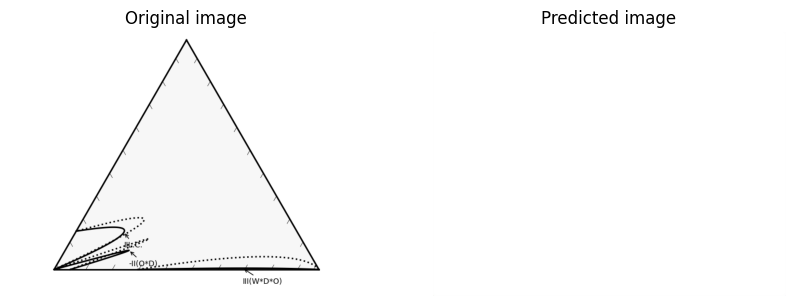

In [3]:
import matplotlib.pyplot as plt

# Convert the data type to uint8 and rescale the values to the 0-255 range
new_input_img_disp = np.clip(new_input_img * 255, 0, 255).astype('uint8')
new_output_img_disp = np.clip(new_output_img * 255, 0, 255).astype('uint8')

# Create a new figure
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(new_input_img_disp)
plt.title("Original image")
plt.axis("off")

# Display the predicted image
plt.subplot(1, 2, 2)
plt.imshow(new_output_img_disp)
plt.title("Predicted image")
plt.axis("off")

# Show the figure
plt.show()


# Attempt 2

1000 images

The model implemented in the provided code is an autoencoder. Autoencoders are a type of neural network that are trained to reconstruct the input data. They consist of an encoder network that compresses the input data into a latent representation and a decoder network that reconstructs the original data from the latent representation.

In this case, the autoencoder is used for image denoising or image restoration. The input images are corrupted or noisy versions, and the model is trained to reconstruct the clean versions of the images as the output. The model consists of convolutional layers, max pooling layers, and up-sampling layers to learn the feature representations and perform the reconstruction.

During training, the model learns to minimize the mean squared error loss between the reconstructed images and the clean images. The optimizer used is Adam, and the loss function used is mean squared error.

After training the autoencoder, it can be used to predict the clean version of a new input image. The provided code demonstrates this by loading a new input image, preprocessing it, and passing it through the model to obtain the predicted output image.

Overall, this model is a convolutional autoencoder that is trained to denoise or restore images by reconstructing the clean versions from the corrupted versions.

# CPU

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt


# Set the directory where your images are
dir_name = "plots"

# Get the list of all files in directory
all_files = os.listdir(dir_name)


# Get the list of input and output image files
input_img_paths = [os.path.join(dir_name, file) for file in all_files if "input" in file]
output_img_paths = [os.path.join(dir_name, file) for file in all_files if "output" in file]

# Sort the lists (this assumes that for each input file 'input_plot_n.png' there is an output file 'output_plot_n.png')
input_img_paths.sort()
output_img_paths.sort()

# Load the images and convert them to numpy arrays
input_imgs = np.array([np.array(Image.open(img_path)) / 255 for img_path in input_img_paths])
output_imgs = np.array([np.array(Image.open(img_path)) / 255 for img_path in output_img_paths])

def crop_center(img, crop_width, crop_height):
    img_width, img_height = img.size
    return img.crop(((img_width - crop_width) // 2,
                     (img_height - crop_height) // 2,
                     (img_width + crop_width) // 2,
                     (img_height + crop_height) // 2))

# Get the dimensions of the first input image
image_shape = Image.open(input_img_paths[0]).size
crop_width, crop_height = image_shape

# Load and preprocess the data
input_imgs = np.array([img_to_array(crop_center(load_img(img_path), crop_width, crop_height)) / 255 for img_path in input_img_paths])
output_imgs = np.array([img_to_array(crop_center(load_img(img_path), crop_width, crop_height)) / 255 for img_path in output_img_paths])

# Split the data into training and validation sets
input_train, input_val, output_train, output_val = train_test_split(input_imgs, output_imgs, test_size=0.2, random_state=42)

# Set the CPU as the default device
tf.config.set_visible_devices([], 'GPU')

# Define the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_imgs.shape[1:]),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
with tf.device('/CPU:0'):  # Specify CPU device
    model.fit(input_train, output_train, epochs=10, validation_data=(input_val, output_val))

# Predict on a new image
new_input_img = img_to_array(load_img("C:/Users/maxwe/Documents/Github repos/ChemProject/plots/input_plot_1.png")) / 255
new_output_img = model.predict(new_input_img[np.newaxis, ...])[0]


Epoch 1/10
25/25 [==============================] - 303s 11s/step - loss: 0.0602 - val_loss: 0.0206
Epoch 2/10
25/25 [==============================] - 271s 11s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 3/10
25/25 [==============================] - 282s 11s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 4/10
25/25 [==============================] - 283s 11s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 5/10
25/25 [==============================] - 283s 11s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 6/10
25/25 [==============================] - 281s 11s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 7/10
25/25 [==============================] - 279s 11s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 8/10
25/25 [==============================] - 284s 11s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 9/10
25/25 [==============================] - 288s 11s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 10/10
1/1 [==============================] - 0s 247ms/step


In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Set the directory where your images are
dir_name = "plots"

# Get the list of all files in directory
all_files = os.listdir(dir_name)


# Get the list of input and output image files
input_img_paths = [os.path.join(dir_name, file) for file in all_files if "input" in file]
output_img_paths = [os.path.join(dir_name, file) for file in all_files if "output" in file]

# Sort the lists (this assumes that for each input file 'input_plot_n.png' there is an output file 'output_plot_n.png')
input_img_paths.sort()
output_img_paths.sort()

# Load the images and convert them to numpy arrays
input_imgs = np.array([np.array(Image.open(img_path)) / 255 for img_path in input_img_paths])
output_imgs = np.array([np.array(Image.open(img_path)) / 255 for img_path in output_img_paths])

def crop_center(img, crop_width, crop_height):
    img_width, img_height = img.size
    return img.crop(((img_width - crop_width) // 2,
                     (img_height - crop_height) // 2,
                     (img_width + crop_width) // 2,
                     (img_height + crop_height) // 2))

# Get the dimensions of the first input image
image_shape = Image.open(input_img_paths[0]).size
crop_width, crop_height = image_shape

# Load and preprocess the data
input_imgs = np.array([img_to_array(crop_center(load_img(img_path), crop_width, crop_height)) / 255 for img_path in input_img_paths])
output_imgs = np.array([img_to_array(crop_center(load_img(img_path), crop_width, crop_height)) / 255 for img_path in output_img_paths])

# Split the data into training and validation sets
input_train, input_val, output_train, output_val = train_test_split(input_imgs, output_imgs, test_size=0.2, random_state=42)

# Set the CPU as the default device
tf.config.set_visible_devices([], 'GPU')

# Define the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_imgs.shape[1:]),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

# Compile the model
learning_rate = 0.001  # Adjust this value as needed
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
with tf.device('/CPU:0'):  # Specify CPU device
    model.fit(input_train, output_train, epochs=1, validation_data=(input_val, output_val))

# Predict on a new image
new_input_img = img_to_array(load_img("C:/Users/maxwe/Documents/Github repos/ChemProject/plots/input_plot_1.png")) / 255
new_input_img = np.expand_dims(new_input_img, axis=0)  # Add extra dimension for batch
new_output_img = model.predict(new_input_img)[0]




1/1 [==============================] - 0s 115ms/step


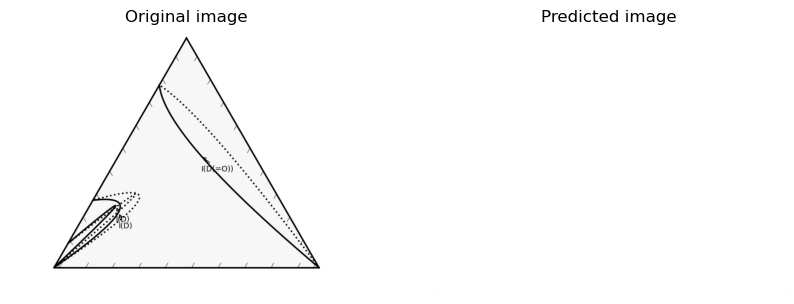

In [5]:
# Convert the data type to uint8 and rescale the values to the 0-255 range
new_input_img_disp = np.clip(new_input_img * 255, 0, 255).astype('uint8')
new_output_img_disp = np.clip(new_output_img * 255, 0, 255).astype('uint8')

# Create a new figure
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(new_input_img_disp))  # Use np.squeeze to remove the first dimension
plt.title("Original image")
plt.axis("off")

# Display the predicted image
plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(new_output_img_disp))  # Use np.squeeze to remove the first dimension
plt.title("Predicted image")
plt.axis("off")

# Show the figure
plt.show()

# GPU

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os
from PIL import Image
import tensorflow as tf


# Set the directory where your images are
dir_name = "plots"

# Get the list of all files in directory
all_files = os.listdir(dir_name)


# Get the list of input and output image files
input_img_paths = [os.path.join(dir_name, file) for file in all_files if "input" in file]
output_img_paths = [os.path.join(dir_name, file) for file in all_files if "output" in file]

# Sort the lists (this assumes that for each input file 'input_plot_n.png' there is an output file 'output_plot_n.png')
input_img_paths.sort()
output_img_paths.sort()

# Load the images and convert them to numpy arrays
input_imgs = np.array([np.array(Image.open(img_path)) / 255 for img_path in input_img_paths])
output_imgs = np.array([np.array(Image.open(img_path)) / 255 for img_path in output_img_paths])

def crop_center(img, crop_width, crop_height):
    img_width, img_height = img.size
    return img.crop(((img_width - crop_width) // 2,
                     (img_height - crop_height) // 2,
                     (img_width + crop_width) // 2,
                     (img_height + crop_height) // 2))

# Get the dimensions of the first input image
image_shape = Image.open(input_img_paths[0]).size
crop_width, crop_height = image_shape

# Load and preprocess the data
input_imgs = np.array([img_to_array(crop_center(load_img(img_path), crop_width, crop_height)) / 255 for img_path in input_img_paths])
output_imgs = np.array([img_to_array(crop_center(load_img(img_path), crop_width, crop_height)) / 255 for img_path in output_img_paths])

# Split the data into training and validation sets
input_train, input_val, output_train, output_val = train_test_split(input_imgs, output_imgs, test_size=0.2, random_state=42)

# Set the GPU as the default device
tf.config.set_visible_devices(tf.config.list_physical_devices('GPU'))

# Enable memory growth to allocate memory on the GPU as needed
for gpu in tf.config.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)

# Define the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_imgs.shape[1:]),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
with tf.device('/GPU:0'):
    model.fit(input_train, output_train, epochs=10, validation_data=(input_val, output_val))

# Predict on a new image
new_input_img = img_to_array(load_img("C:/Users/maxwe/Documents/Github repos/ChemProject/plots/input_plot_1.png")) / 255
new_output_img = model.predict(new_input_img[np.newaxis, ...])[0]


NotFoundError: No CPU devices are available in this process

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [ ]:
import matplotlib.pyplot as plt

# Convert the data type to uint8 and rescale the values to the 0-255 range
new_input_img_disp = np.clip(new_input_img * 255, 0, 255).astype('uint8')
new_output_img_disp = np.clip(new_output_img * 255, 0, 255).astype('uint8')

# Create a new figure
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(new_input_img_disp)
plt.title("Original image")
plt.axis("off")

# Display the predicted image
plt.subplot(1, 2, 2)
plt.imshow(new_output_img_disp)
plt.title("Predicted image")
plt.axis("off")

# Show the figure
plt.show()


# Conclusion

The initial results did not meet our expectations, indicating the need for adjustments and improvements to the model. Several tweaks were implemented, including increasing the volume of data used for training. By incorporating more data and fine-tuning the model, we anticipate achieving better and more accurate results. 